In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install plotly
!pip install --upgrade nbformat
!pip install nltk
!pip install spacy
!pip install WordCloud

import nltk
nltk.download('punkt')

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
!pip install jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.2 MB/s eta 0:00:00


In [4]:
df_true=pd.read_csv('True.csv')

In [ ]:
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
df_true.isnull().sum()

,0
title,0
text,0
subject,0
date,0


In [ ]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [5]:
df_fake=pd.read_csv('Fake.csv')

In [ ]:
df_fake.isnull().sum()
df_fake.shape

(23481, 4)

**Exploratory Data Analysis**

Featue Engineering

In [6]:
df_true['isfake']=0
df_true.head()

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [8]:
df_fake['isfake']=1
df_fake.head()

,title,text,subject,date,isfake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [9]:
#Concatenate real and fake news
df=pd.concat([df_true,df_fake]).reset_index(drop=True)
df

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [10]:
df.drop(columns=['date'],inplace=True)

In [11]:
#combine title and text together
df['original']=df['title']+' '+df['text']
df.head()

,title,text,subject,isfake,original
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,Trump wants Postal Service to charge 'much mor...


In [ ]:
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

Data Cleaning

In [12]:
#download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
#obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [14]:
#Remove stopwords and remove words with  2 or less characters

def preprocess(text):
    result = []

    # Convert to lowercase and remove punctuation (excluding alphanumeric words)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.lower())

    # Tokenize text (split by spaces) and filter short words (≤2 letters)
    tokens = text.split()

    for token in tokens:
        if len(token) > 3 and token not in stop_words:  # Remove short words and stopwords
            result.append(token)

    return result


In [15]:
df['clean']=df['original'].apply(preprocess)

In [ ]:
df


,title,text,subject,isfake,original,clean
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, mueller, washing..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,FBI Russia probe helped by Australian diplomat...,"[russia, probe, helped, australian, diplomat, ..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,Trump wants Postal Service to charge 'much mor...,"[trump, wants, postal, service, charge, much, ..."
...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,1,McPain: John McCain Furious That Iran Treated ...,"[mcpain, john, mccain, furious, iran, treated,..."
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,1,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,"[justice, yahoo, settles, email, privacy, clas..."
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,1,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,"[sunnistan, allied, safe, zone, plan, take, te..."
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,1,How to Blow $700 Million: Al Jazeera America F...,"[blow, million, jazeera, america, finally, cal..."


In [ ]:
print(df['clean'][0])

['budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script', 'washington', 'reuters', 'head', 'conservative', 'republican', 'faction', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'cuts', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', '2018', 'keeping', 'sharp', 'pivot', 'among', 'republicans', 'representative', 'mark', 'meadows', 'speaking', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmakers', 'bracing', 'battle', 'january', 'return', 'holidays', 'wednesday', 'lawmakers', 'begin', 'trying', 'pass', 'federal', 'budget', 'fight', 'likely', 'linked', 'issues', 'immigration', 'policy', 'even', 'november', 'congressional', 'election', 'campaigns', 'approach', 'republicans', 'seek', 'keep', 'control', 'congress', 'president', 'donald', 'trump', 'republicans', 'want', 'budget', 'increase', 'military', 'spending', 'democrats', 'also', 'want', 'proportional', 'increases', 'nondefense', 'discretionary',

In [16]:
#obtain the total words present in the dataset
list_of_words=[]
for i in df.clean:
    for j in i:
        list_of_words.append(j)

In [17]:
len(list_of_words)

10002399

In [18]:
#obtain total number of unique words
total_words=len(list(set(list_of_words)))
total_words

225821

In [19]:
#join the words into a string
df['clean_joined']=df['clean'].apply(lambda x: " ".join(x))

In [ ]:
df['clean_joined'][0]

'budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint 2018 keeping sharp pivot among republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy even november congressional election campaigns approach republicans seek keep control congress president donald trump republicans want budget increase military spending democrats also want proportional increases nondefense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration already willing going increase nondefense discretionary spending percent meadows chairman small influential house freedom caucus said program

**Visualize cleaned up Data**

In [ ]:
df

,title,text,subject,isfake,original,clean,clean_joined
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc...",budget fight looms republicans flip fiscal scr...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond...",military accept transgender recruits monday pe...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, mueller, washing...",senior republican senator mueller washington r...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,FBI Russia probe helped by Australian diplomat...,"[russia, probe, helped, australian, diplomat, ...",russia probe helped australian diplomat tipoff...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,Trump wants Postal Service to charge 'much mor...,"[trump, wants, postal, service, charge, much, ...",trump wants postal service charge much amazon ...
...,...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,1,McPain: John McCain Furious That Iran Treated ...,"[mcpain, john, mccain, furious, iran, treated,...",mcpain john mccain furious iran treated sailor...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,1,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,"[justice, yahoo, settles, email, privacy, clas...",justice yahoo settles email privacy classactio...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,1,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,"[sunnistan, allied, safe, zone, plan, take, te...",sunnistan allied safe zone plan take territori...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,1,How to Blow $700 Million: Al Jazeera America F...,"[blow, million, jazeera, america, finally, cal...",blow million jazeera america finally calls qui...


<Axes: xlabel='count', ylabel='subject'>

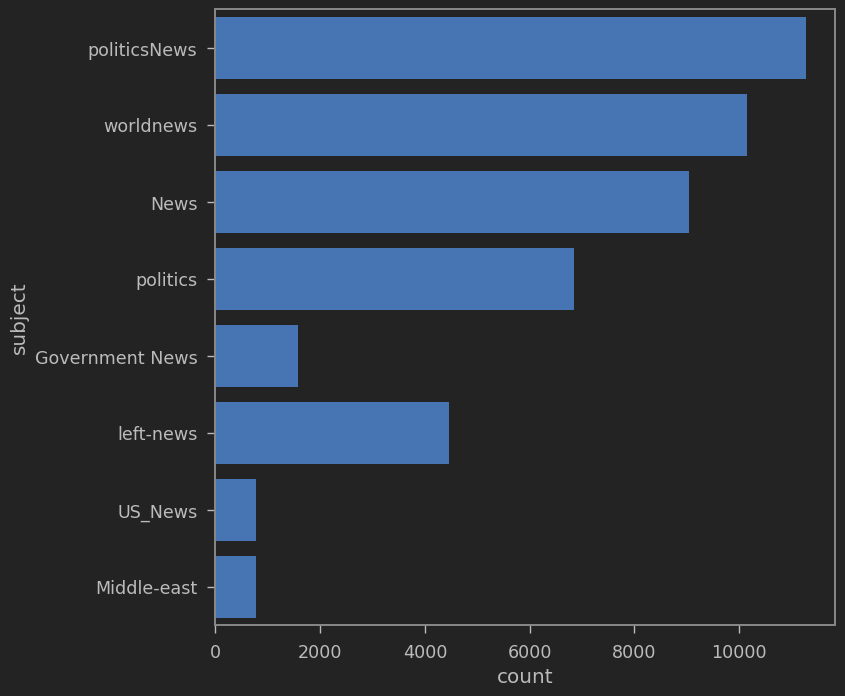

In [ ]:
#plot the number of samples in  'subject'
plt.figure(figsize=(8,8))
sns.countplot(y='subject',data=df)
#

<Axes: xlabel='count', ylabel='isfake'>

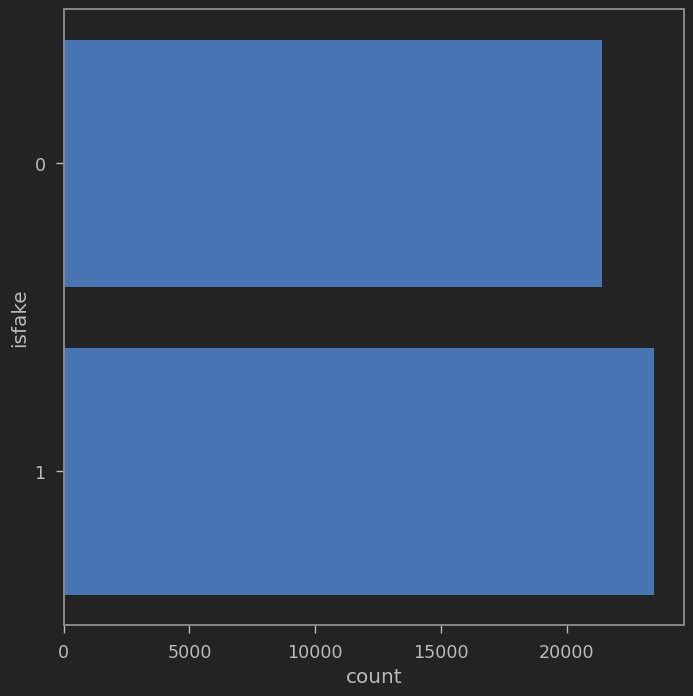

In [ ]:
#plot the countplot for fake vs true news
plt.figure(figsize=(8,8))
sns.countplot(y='isfake',data=df)
#

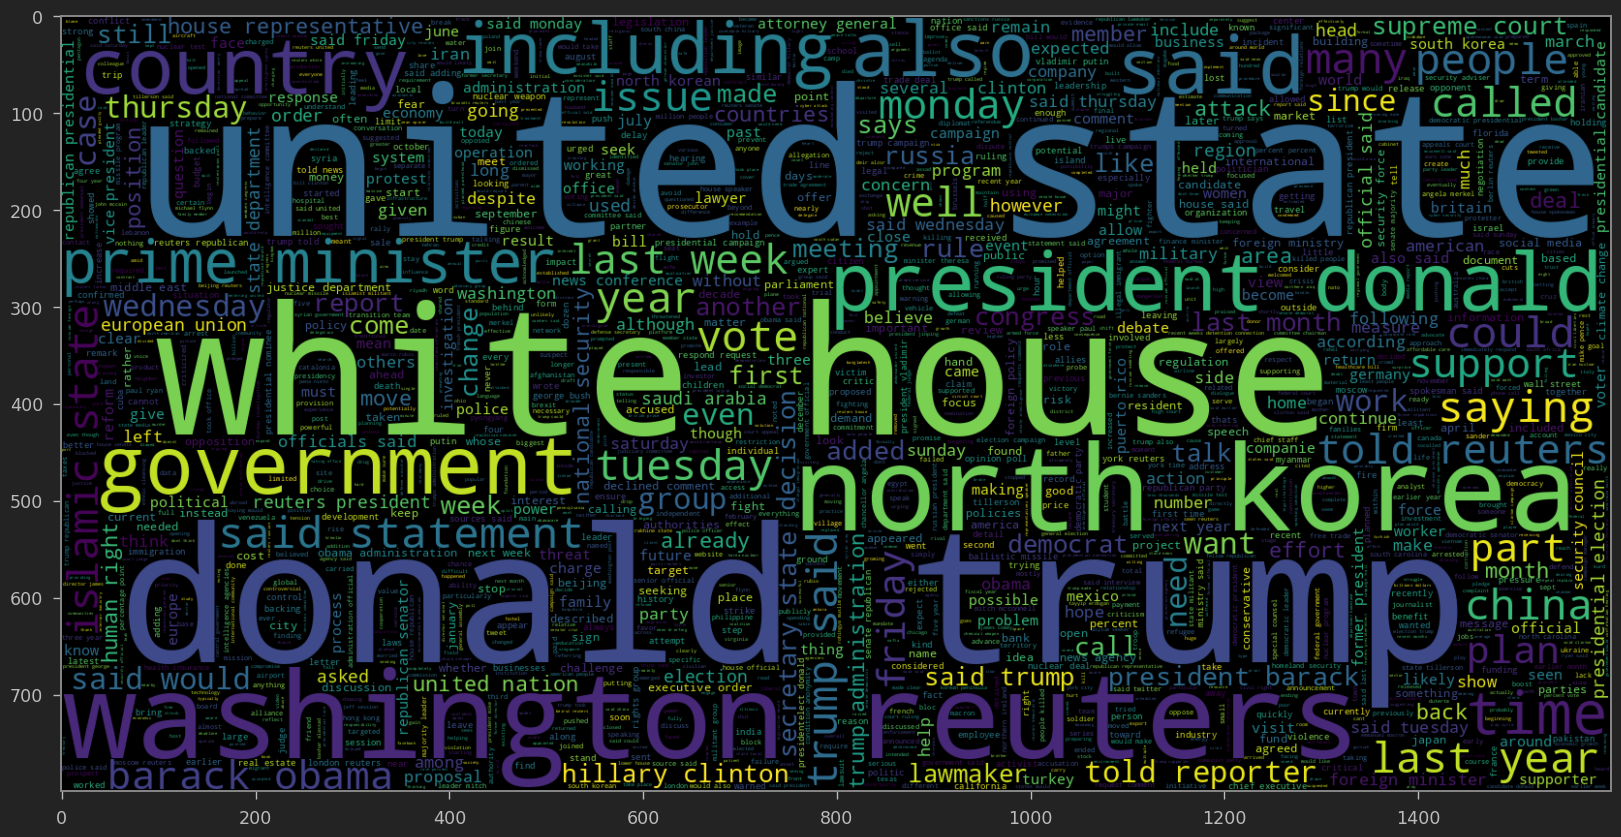

In [ ]:
#plot the word cloud for text that is Real
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=2000,width=1600,height=800,stopwords=stop_words).generate(" ".join(df[df.isfake==0]['clean_joined']))
plt.imshow(wc,interpolation='bilinear')
#

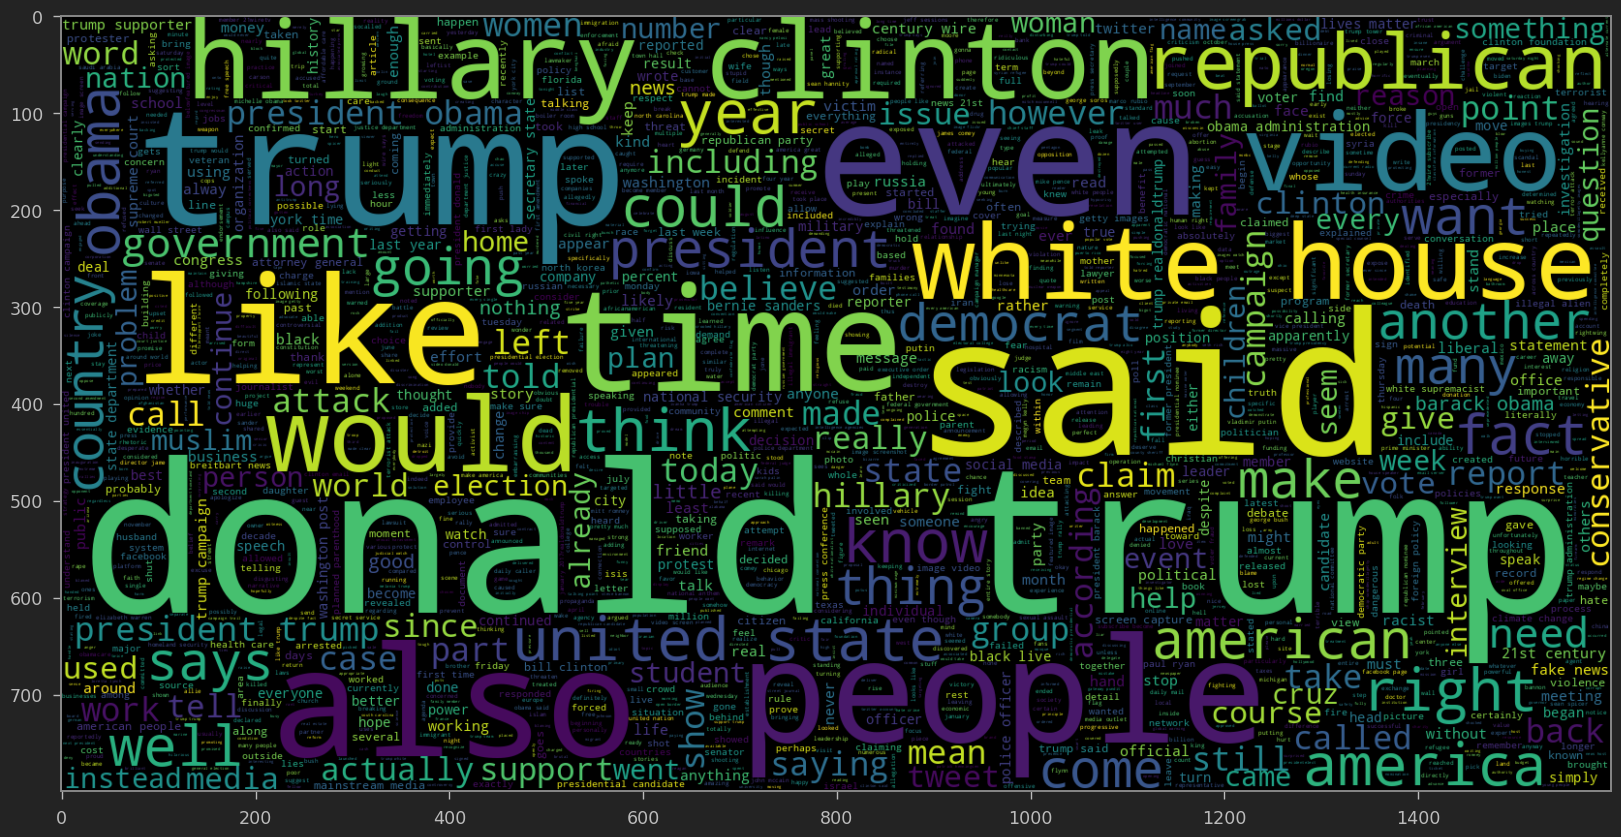

In [ ]:
#plot the word cloud for text that is Fake
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=2000,width=1600,height=800,stopwords=stop_words).generate(" ".join(df[df.isfake==1]['clean_joined']))
plt.imshow(wc,interpolation='bilinear')

In [20]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [21]:
#Length of maximum document(news) will be needed to create word embeddings
maxlen=-1
for doc in df.clean_joined:
    tokens=nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen=len(tokens)
print("The maximum number of words in any document is:",maxlen)

The maximum number of words in any document is: 4637


In [ ]:
#visualize the distribution of number of words in a text
import plotly.express as px
fig=px.histogram(x=[len(nltk.word_tokenize(x)) for x in df.clean_joined],nbins=100)
fig.show()

**Prepare Data by Performing Tokenization and Padding**

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.clean_joined,df.isfake,test_size=0.2)

In [23]:
from nltk import word_tokenize

In [24]:
#create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer=Tokenizer(num_words=total_words)
tokenizer.fit_on_texts(x_train)
train_sequences=tokenizer.texts_to_sequences(x_train)
test_sequences=tokenizer.texts_to_sequences(x_test)

In [25]:
len(train_sequences)

35918

In [ ]:
print("The encoding for document\n",df.clean_joined[0],"\n is :",train_sequences[0])

The encoding for document
 budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint 2018 keeping sharp pivot among republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy even november congressional election campaigns approach republicans seek keep control congress president donald trump republicans want budget increase military spending democrats also want proportional increases nondefense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration already willing going increase nondefense discretionary spending percent meadows chairman small influential house f

In [44]:
maxlen

4637

In [50]:
#add padding
padded_train = pad_sequences(train_sequences, padding='post', truncating='post')
padded_test=pad_sequences(test_sequences,maxlen=40,padding='post',truncating='post')

In [27]:
total_words

225821

In [46]:
y_train=np.asarray(y_train)

In [ ]:
print(train_sequences[:5])

[[8, 578, 1880, 5046, 57, 422, 52, 804, 30, 9, 340, 8, 578, 1880, 129, 61, 15, 422, 52, 804, 1009, 17, 8, 706, 310, 276, 177, 66, 8, 45, 1, 103, 630, 722, 7367, 1, 66, 290, 179, 620, 927, 7649, 1036, 311, 2596, 2573, 4658, 1637, 3421, 179, 1302, 5892, 204, 2960, 43, 23, 1216, 168, 238, 1135, 310, 340, 528, 578, 1880, 61, 52, 1, 1960, 22, 414], [31, 19882, 11414, 10917, 393, 8930, 24, 590, 393, 170, 72, 1265, 143, 591, 1604, 5708, 381, 412, 207, 2734, 4384, 2078, 1678, 59, 51, 275, 29, 13, 83, 190, 221, 29, 332, 1404, 3909, 16, 292, 91, 3, 3471, 393, 3, 260, 168, 2193, 15443, 39, 24, 3230, 214, 4795, 393, 397, 12226, 5597, 386, 84, 103839, 1412, 1679, 3272, 23593, 3562, 491, 393, 83, 94, 381, 2187, 381, 482, 246, 86, 47, 5, 306, 3019, 8291, 7446, 366, 2307, 878, 138, 1040, 3019, 3213, 1046, 86, 47, 5, 107, 13, 3272, 333, 305, 746, 4559, 393, 622, 352, 2696, 2470, 5, 978, 5797, 3285, 102, 381, 3745, 1910, 3272, 381, 653, 4409, 1040, 21505, 158, 1852, 5708, 3213, 86, 47, 5, 137, 36901, 30

In [52]:
#Sequential model
model = Sequential()
model.add(Input(shape=(40,)))

#Embedding Layer
model.add(Embedding(total_words, output_dim=64))

#Bidirectional LSTM
model.add(Bidirectional(LSTM(128)))

#Dense Layers
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ (None, 40, 64)              │      14,452,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_9 (Bidirectional)      │ (None, 256)                 │         197,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,683,201 (56.01 MB)

 Trainable params: 14,683,201 (56.01 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
y_train=np.asarray(y_train)

In [53]:
#train the model
model.fit(padded_train,y_train,batch_size=64,validation_split=0.1,epochs=2)

Epoch 1/2
506/506 ━━━━━━━━━━━━━━━━━━━━ 180s 345ms/step - acc: 0.9430 - loss: 0.1290 - val_acc: 0.9978 - val_loss: 0.0096
Epoch 2/2
506/506 ━━━━━━━━━━━━━━━━━━━━ 178s 352ms/step - acc: 0.9998 - loss: 0.0010 - val_acc: 0.9978 - val_loss: 0.0112


**Assess Model Performance**

In [54]:
#model prediction
pred=model.predict(padded_test)

281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [55]:
#if the predicted value is >0.5 it is real..else it is fake
prediction=[]
for i in pred:
    if i>0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [58]:
#getting the accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(list(y_test),prediction)

print("Model accuracy: ",accuracy*100,"%")

Model accuracy:  99.86636971046771 %


<Axes: >

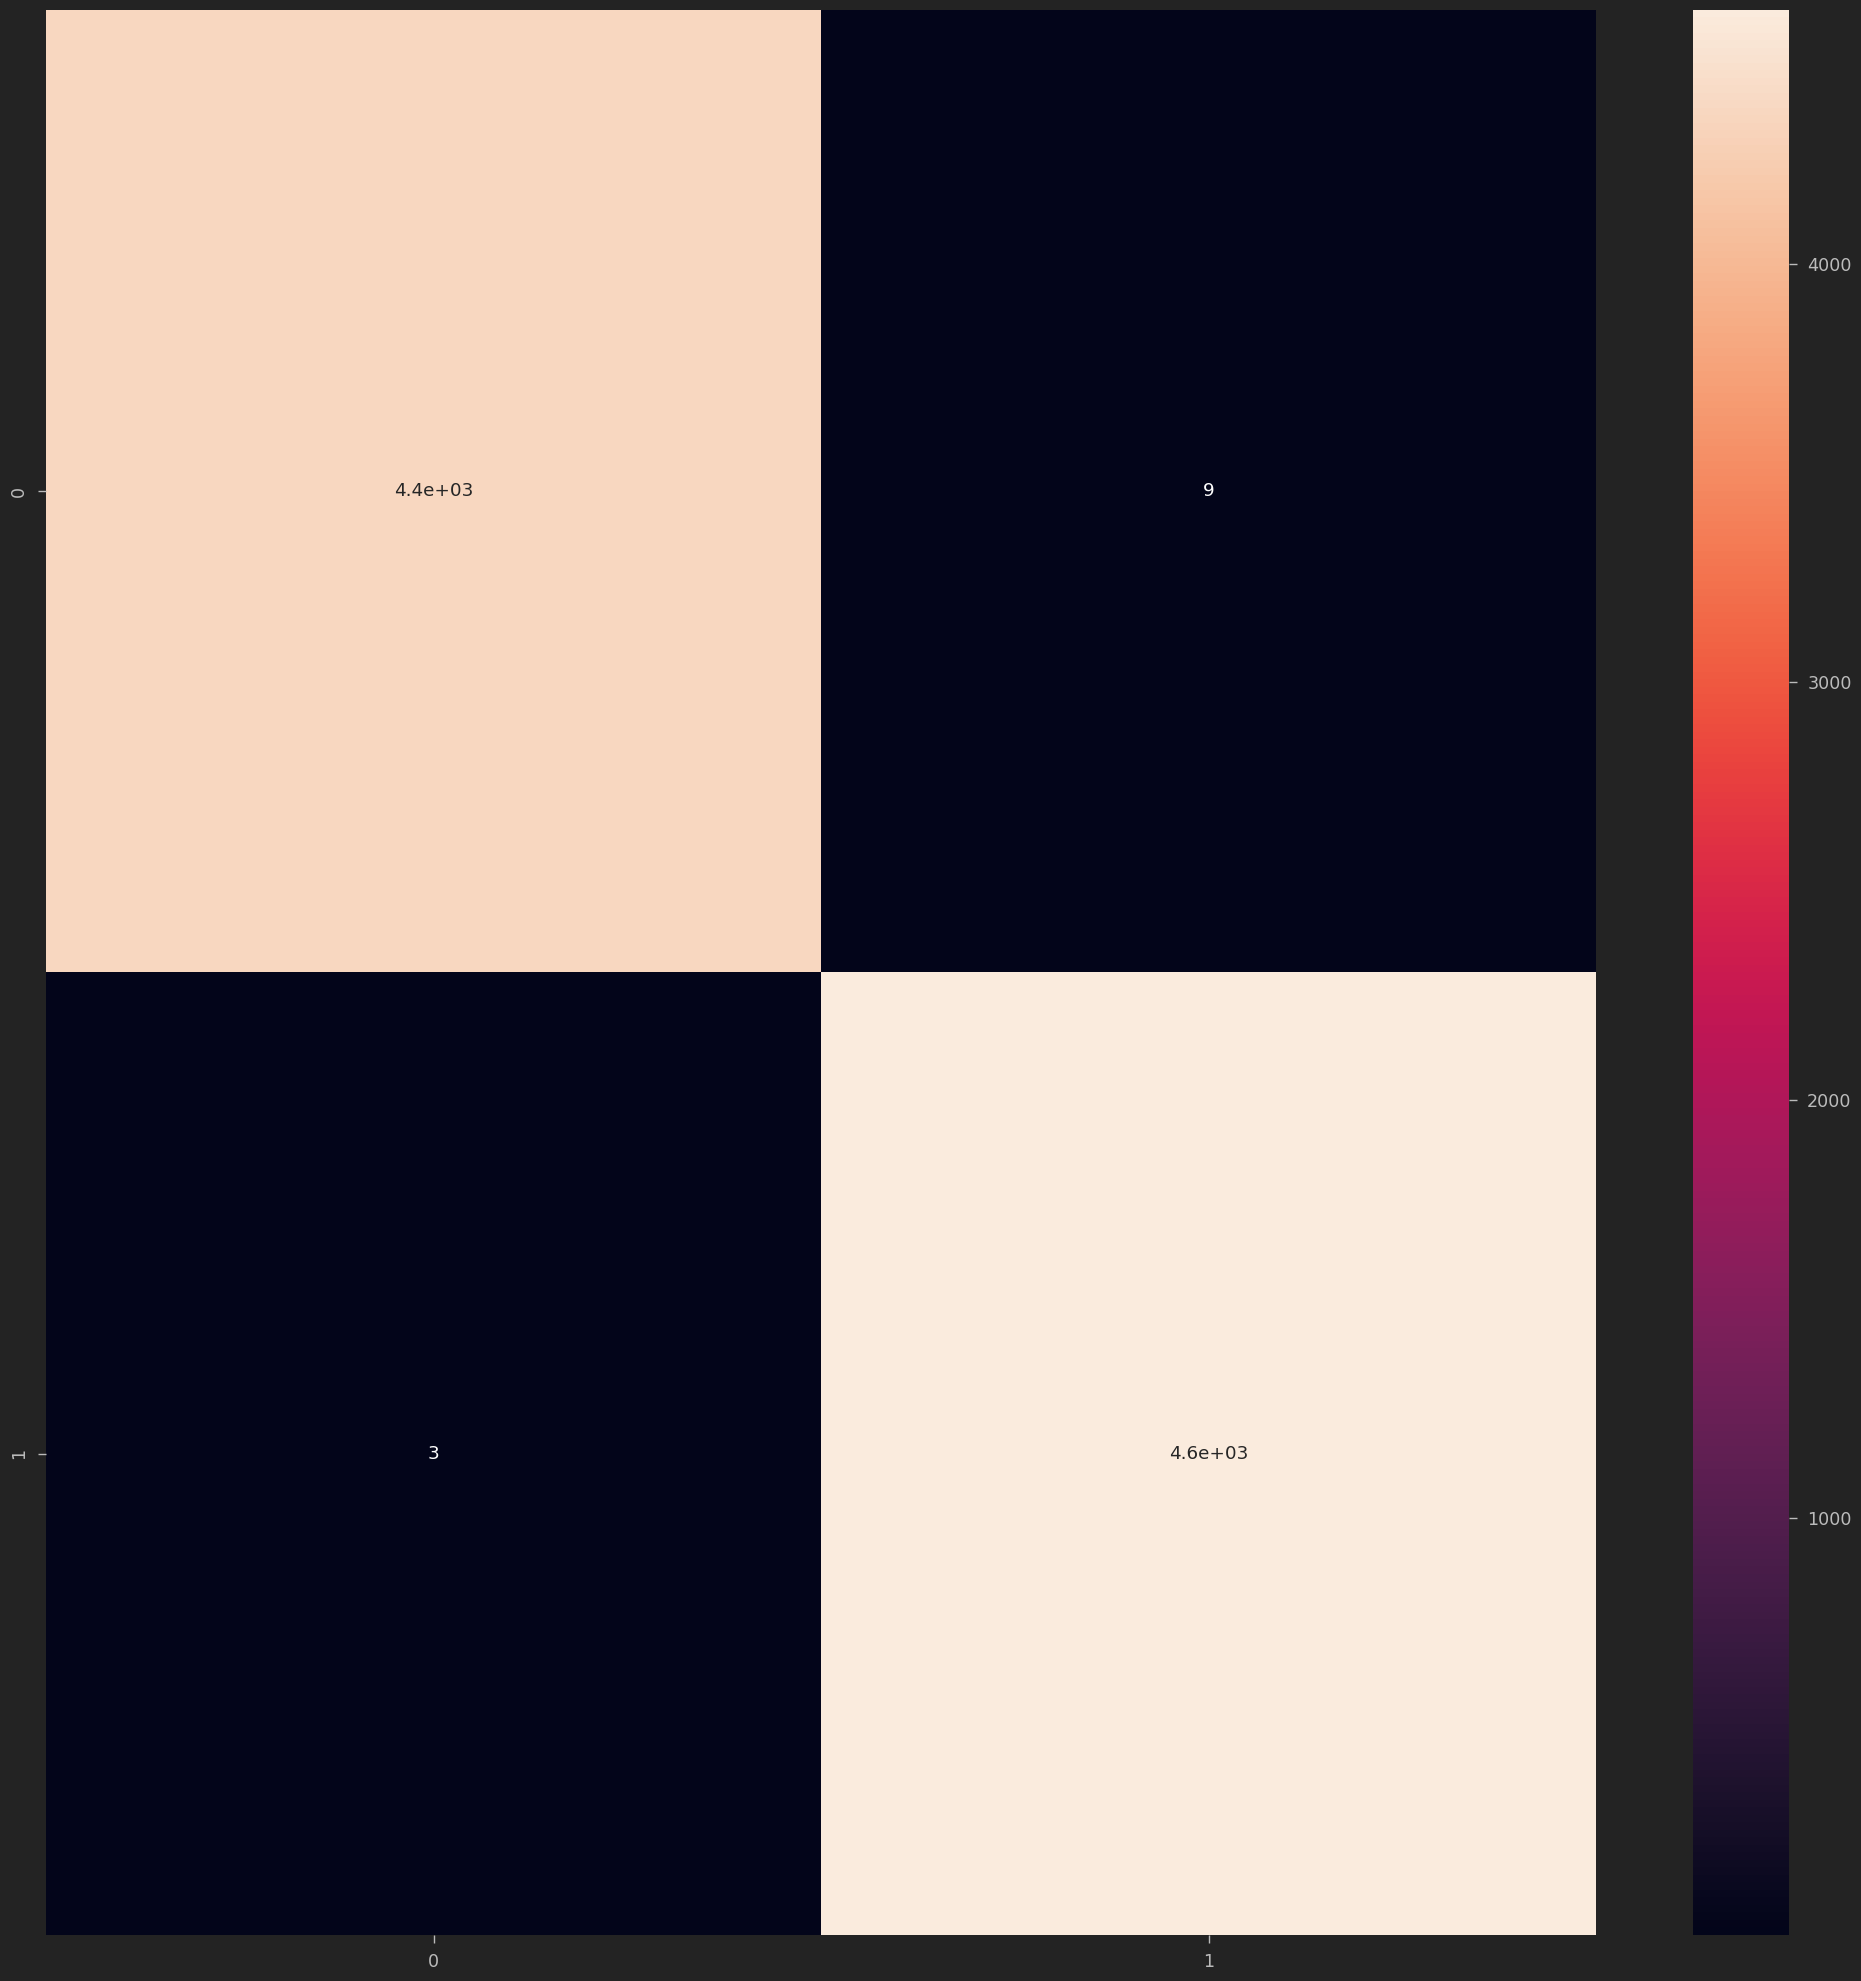

In [59]:
#Get the confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(list(y_test),prediction)
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True)